In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load Dataframe


In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
print("----------------Dataframe Info------------------")
print(df.info())
print("\n")

----------------Dataframe Info------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB
None




In [5]:
print("---------------Dataframe Descibe----------------")
print(df.describe())
print("\n")

---------------Dataframe Descibe----------------
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000




In [6]:
print("---------------First 5 rows of Dataframe----------------")
print(df.head())
print("\n")

---------------First 5 rows of Dataframe----------------
    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0




In [7]:
print("---------------Train Dataset-------------")
X = df[['Age', 'EstimatedSalary']]
Y = df['Purchased']

---------------Train Dataset-------------


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test  Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (300, 2), Y: (300,)
Test  Dataset Size - X: (100, 2), Y: (100,)


Linner Regression<br>
This code fits a logistic regression model on the training data, <br>
makes predictions on the test data, and plots the regression line<br>
along with the actual test data to visualize the accuracy of the model.


In [10]:
print("----------------Linner Regression-------------------")
from sklearn.linear_model import LogisticRegression

----------------Linner Regression-------------------


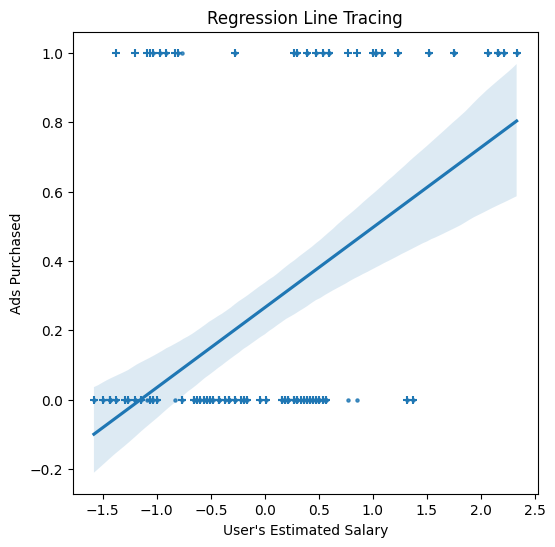

In [11]:
lm = LogisticRegression(random_state=0, solver='lbfgs')
lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)
plt.figure(figsize=(6, 6))
sns.regplot(x = X_test[:, 1], y = predictions, scatter_kws={'s':5})
plt.scatter(X_test[:, 1], Y_test, marker = '+')
plt.xlabel("User's Estimated Salary")
plt.ylabel('Ads Purchased')
plt.title('Regression Line Tracing')
plt.show()

In [12]:
print("-------------Confusion Matrix---------------")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

-------------Confusion Matrix---------------


In [13]:
cm = confusion_matrix(Y_test, predictions)
print(f'''Confusion matrix :\n
               | Positive Prediction\t| Negative Prediction
---------------+------------------------+----------------------
Positive Class | True Positive (TP) {cm[0, 0]}\t| False Negative (FN) {cm[0, 1]}
---------------+------------------------+----------------------
Negative Class | False Positive (FP) {cm[1, 0]}\t| True Negative (TN) {cm[1, 1]}\n\n''')

Confusion matrix :

               | Positive Prediction	| Negative Prediction
---------------+------------------------+----------------------
Positive Class | True Positive (TP) 65	| False Negative (FN) 3
---------------+------------------------+----------------------
Negative Class | False Positive (FP) 8	| True Negative (TN) 24




In [14]:
cm = classification_report(Y_test, predictions)
print('Classification report : \n', cm)

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



Visualizing Training set result<br>
This code visualizes the training set results for the logistic regression model. <br>
It creates a meshgrid of points, makes predictions on those points using the trained model, <br>
and plots the decision boundary. <br>
It also scatters the actual training data points, coloring them based on their true class.<br>
This allows us to see how well the logistic regression model fits the training data.


In [15]:
print("-----------------Visualizing Training set result----------------")
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

-----------------Visualizing Training set result----------------


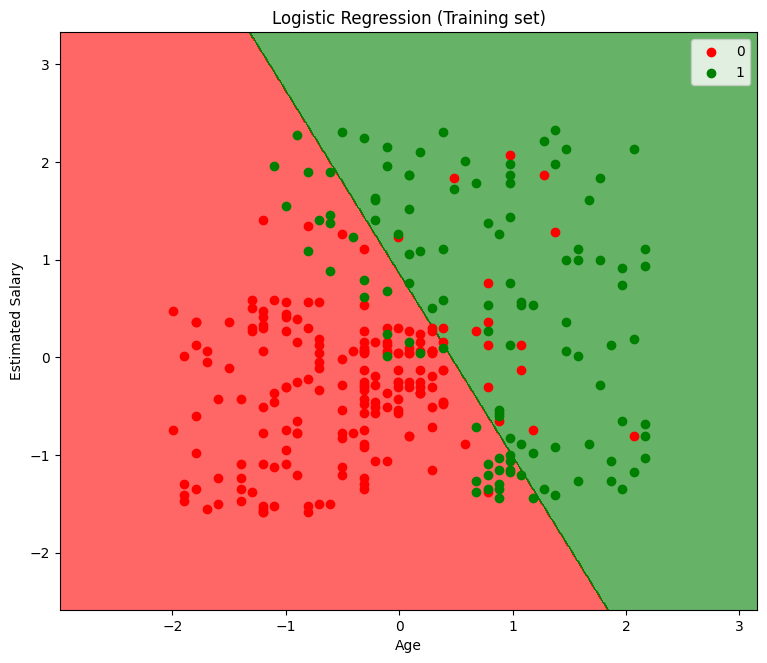

In [16]:
plt.figure(figsize=(9, 7.5))
plt.contourf(X1, X2, lm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')));
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
print("\n")

Visualizing Test set result<br>
This code is visualizing the test set results after training the logistic regression model. <br>
It creates meshgrid of points, makes predictions on those points using the trained model, <br>
and plots the decision boundary. It also scatters the actual test set data points on top.<br>
This allows us to visualize how well the model is able to separate the two classes on the test data.<br>
The various plot settings like colors, alpha, labels etc help interpret the results better.


In [17]:
print("-----------------Visualizing Test set result----------------")
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

-----------------Visualizing Test set result----------------


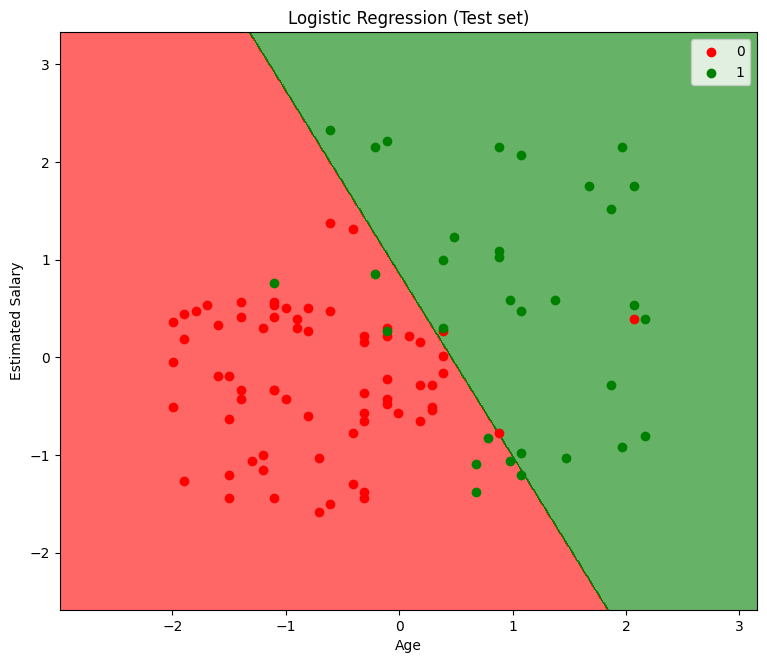

In [18]:
plt.figure(figsize=(9, 7.5))
plt.contourf(X1, X2, lm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
print("\n")